**Name:Xuecheng Liu**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [0]:
data_URL = 'https://raw.githubusercontent.com/efosler/cse5522data/master/height_vs_weight.csv'
data = pd.read_csv(data_URL)


1. Train the model first to predict the probability of basketball given height

**Defining several useful functions**

In [0]:
def sigmoid(x):
  ##activatioin funtion
  return 1/(1+np.exp(-x))
  

In [0]:
def avg_loss(features, target, weights):
  ## cost function
  x = np.dot(features, weights)
  loss = np.sum(np.log(target*sigmoid(x)+(1-target)*(1-sigmoid(x))))
  loss= -loss/float(X_train.shape[0])
  return loss

In [0]:
def updateWeight(features, target, iteration, learning_rate):
    
    ##add the first bias column
    features = np.insert(features, 0, 1, axis=1)
    weights = np.zeros(features.shape[1])
    
    for i in range(iteration):
        x = np.dot(features, weights)
        gradient = np.dot(features.T, (target - sigmoid(x)))
        weights += learning_rate * gradient
        
    
    print ('The average loss over testing data is:',avg_loss(features, target, weights))
        
    return weights


In [0]:
def pred(X_train,y_train,weights):
    X_train = np.insert(X_train,0,1,axis=1)
    x = np.dot(X_train,weights)
    prediction = sigmoid(x)
    prob = []
    for i in range(X_train.shape[0]):
        if prediction[i] >0.5:
            prob.append(1)
        else:
            prob.append(0)
    return prob

In [0]:
def accuracy(pred,target):
    count = 0
    for i in range(len(pred)-1):
        if pred[i] == target[i]:
            count += 1
    return count/len(target)

In [0]:
#Try to normalize data to improve predict
X = np.array(data[['height']],dtype='float')
y = np.array(data['basketball'],dtype='float')
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)


**The following section if for question 1**

The average loss over testing data is: 0.6233624293044369
The accuracy with one feature "height" is: 0.6


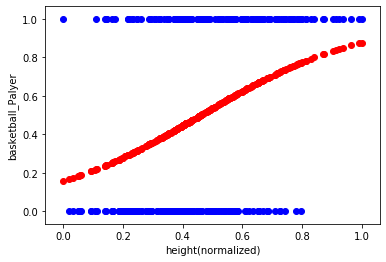

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,shuffle = True)
weights = updateWeight(X_train, y_train,iteration = 1000, learning_rate = 0.001)
predictions = pred(X_test,y_test,weights)
print('The accuracy with one feature "height" is:',accuracy(predictions,y_test))
plt.scatter(X_train, y_train, color='blue')

X_train_bias = np.insert(X_train,0,1,axis=1)

x = np.dot(X_train_bias,weights)
y_value = sigmoid(x)

plt.scatter(X_train, y_value, color='red')
plt.ylabel('basketball_Palyer')
plt.xlabel('height(normalized)')
plt.show()

**The following section is for question 2**

In [0]:

X = np.array(data[['height']],dtype='float')
y = np.array(data['basketball'],dtype='float')
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

GENDER = np.array(data[['female']],dtype='float')
X_norm = np.hstack((X_norm,GENDER))



The average loss over testing data is: 0.5885772481874538
The accuracy with two features "height" and "gender" is: 0.65 



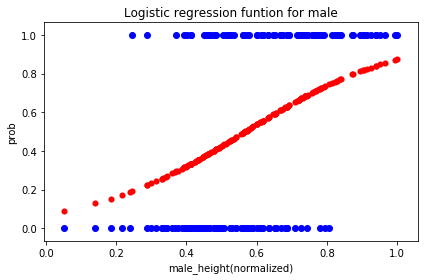

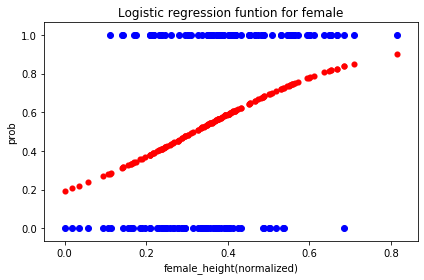

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,shuffle = True)
weights = updateWeight(X_train, y_train,iteration = 1000, learning_rate = 0.001)
predictions = pred(X_test,y_test,weights)
print('The accuracy with two features "height" and "gender" is:',accuracy(predictions,y_test),'\n')

test = X_train
test = np.insert(test,0,1,axis=1)
x = np.dot(test,weights)

y_value = sigmoid(x)
x_value=[]
male =[]
y_male = []
female = []
y_female=[]
target_male=[]
target_female=[]
for i in range(320):
    if X_train[i][1]==0:
        male.append(X_train[i][0])
        y_male.append(y_value[i])
        target_male.append(y_train[i])
    else:
        female.append(X_train[i][0])
        y_female.append(y_value[i])
        target_female.append(y_train[i])


plt.scatter(male, target_male, color='blue', zorder=25)
plt.scatter(male, y_male, color='red', linewidths=0.1)
plt.ylabel('prob')
plt.xlabel('male_height(normalized)')
plt.title('Logistic regression funtion for male')
plt.tight_layout()
plt.show()

plt.scatter(female, target_female, color='blue', zorder=25)
plt.scatter(female, y_female, color='red', linewidth=0.1)
plt.ylabel('prob')
plt.xlabel('female_height(normalized)')
plt.title('Logistic regression funtion for female')
plt.tight_layout()
plt.show()

Observations: Based on the graph above, the learned function makes sense
since the curve shows it is more likely for a male to be a basketball
player at a certain height than female, which matches our common sense.

**The next section is for question 3**

In [0]:

print('Loss and accuracy for features {height,weight}')
X = np.array(s[['height','weight']],dtype='float')
y = np.array(s['basketball'],dtype='float')
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,shuffle = True)
weights = updateWeight(X_train, y_train,iteration = 1000, learning_rate = 0.001)
predictions = pred(X_test,y_test,weights)
print('The accuracy for features {height,weight} is:',accuracy(predictions,y_test),'\n')


print('Loss and accuracy for features {height,female,weight}')
X = np.array(s[['height','weight','female']],dtype='float')
y = np.array(s['basketball'],dtype='float')
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,shuffle = True)
weights = updateWeight(X_train, y_train,iteration = 1000, learning_rate = 0.001)
predictions = pred(X_test,y_test,weights)
print('The accuracy for features{height,weight,female} is:',accuracy(predictions,y_test))


Loss and accuracy for features {height,weight}
The average loss over testing data is: 0.5669318770639681
The accuracy for features {height,weight} is: 0.5625 

Loss and accuracy for features {height,female,weight}
The average loss over testing data is: 0.5596089706226166
The accuracy for features{height,weight,female} is: 0.75


Observations: Based on the result above, gender as an additional feature
helps to imporve the accuracy and decrease the loss. Thus, it helps as
a feature for most of the times. However, sometimes it may cause our model
to predict worse because of the way it splits the data.